In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [181]:
master_movie = pd.read_csv("data/master_movie.csv", index_col = 0)
master_movie.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,actor,Johnny Depp
1,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,actress,Penélope Cruz
2,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,actor,Ian McShane
3,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,actor,Geoffrey Rush
4,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,director,Rob Marshall


In [182]:
genre_df = master_movie.copy()

In [183]:
genre_df.drop_duplicates(subset = "movie", inplace = True)

In [184]:
genre_df.shape

(1157, 12)

In [185]:
genre_df[['genre_1', 'genre_2', 'genre_3']] = genre_df['genres'].str.split(',', expand = True)
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,actor,Johnny Depp,Action,Adventure,Fantasy
5,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.30000,665594,producer,Kevin Feige,Action,Adventure,Sci-Fi
11,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.50000,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi
17,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.50000,329135,actor,Ben Affleck,Action,Adventure,Fantasy
22,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.80000,352504,actor,Daniel Craig,Action,Adventure,Thriller


In [186]:
genre_df.drop(['genres', 'category', 'name'], axis = 1, inplace = True)


In [187]:
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,averagerating,numvotes,genre_1,genre_2,genre_3
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,6.60000,447624,Action,Adventure,Fantasy
5,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,7.30000,665594,Action,Adventure,Sci-Fi
11,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,8.50000,670926,Action,Adventure,Sci-Fi
17,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,6.50000,329135,Action,Adventure,Fantasy
22,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,6.80000,352504,Action,Adventure,Thriller


In [188]:
genre_df['genre_1'].value_counts()

Action         343
Comedy         232
Drama          204
Adventure      131
Biography       98
Crime           58
Horror          55
Documentary     14
Animation        8
Thriller         4
Fantasy          3
Mystery          3
Music            1
Romance          1
Family           1
unknown          1
Name: genre_1, dtype: int64

In [189]:
genre_df['genre_2'].value_counts()

Drama          277
Adventure      153
Comedy         107
Crime           80
Romance         74
Animation       65
Mystery         61
Thriller        57
Fantasy         37
Horror          35
Family          32
Music           21
Sci-Fi          18
Biography       11
Sport            8
History          7
War              3
Western          3
Documentary      2
Name: genre_2, dtype: int64

In [190]:
genre_df['genre_3'].value_counts()

Thriller     134
Drama        105
Romance       87
Sci-Fi        83
Comedy        80
Fantasy       55
Crime         41
Family        36
Mystery       32
History       28
Horror        27
Sport         15
Music         14
Animation     13
War            8
Western        5
Musical        4
Biography      2
Name: genre_3, dtype: int64

In [191]:
genre_df[['genre_1','genre_2','genre_3']].apply(pd.Series.value_counts)

,genre_1,genre_2,genre_3
Action,343.00000,nan,nan
Adventure,131.00000,153.00000,nan
Animation,8.00000,65.00000,13.00000
Biography,98.00000,11.00000,2.00000
Comedy,232.00000,107.00000,80.00000
Crime,58.00000,80.00000,41.00000
Documentary,14.00000,2.00000,nan
Drama,204.00000,277.00000,105.00000
Family,1.00000,32.00000,36.00000
Fantasy,3.00000,37.00000,55.00000


In [192]:
genre_df.shape

(1157, 12)

In [193]:
type(genre_df[['genre_1','genre_2','genre_3']].apply(pd.Series.value_counts))

pandas.core.frame.DataFrame

In [194]:
genre_df_cleaned = genre_df[['genre_1','genre_2','genre_3']].apply(pd.Series.value_counts)
genre_df_cleaned.head()

,genre_1,genre_2,genre_3
Action,343.00000,nan,nan
Adventure,131.00000,153.00000,nan
Animation,8.00000,65.00000,13.00000
Biography,98.00000,11.00000,2.00000
Comedy,232.00000,107.00000,80.00000


In [195]:
genre_df_cleaned = genre_df_cleaned.replace(np.nan, 0)

In [196]:
genre_df_cleaned.head()

,genre_1,genre_2,genre_3
Action,343.00000,0.00000,0.00000
Adventure,131.00000,153.00000,0.00000
Animation,8.00000,65.00000,13.00000
Biography,98.00000,11.00000,2.00000
Comedy,232.00000,107.00000,80.00000


In [197]:
genre_df_cleaned['total_column'] = genre_df_cleaned.sum(axis = 1)

In [198]:
genre_df_cleaned

,genre_1,genre_2,genre_3,total_column
Action,343.00000,0.00000,0.00000,343.00000
Adventure,131.00000,153.00000,0.00000,284.00000
Animation,8.00000,65.00000,13.00000,86.00000
Biography,98.00000,11.00000,2.00000,111.00000
Comedy,232.00000,107.00000,80.00000,419.00000
Crime,58.00000,80.00000,41.00000,179.00000
Documentary,14.00000,2.00000,0.00000,16.00000
Drama,204.00000,277.00000,105.00000,586.00000
Family,1.00000,32.00000,36.00000,69.00000
Fantasy,3.00000,37.00000,55.00000,95.00000


In [199]:
genre_df_cleaned['total_column'].sort_values(ascending = False)

Drama         586.00000
Comedy        419.00000
Action        343.00000
Adventure     284.00000
Thriller      195.00000
Crime         179.00000
Romance       162.00000
Horror        117.00000
Biography     111.00000
Sci-Fi        101.00000
Mystery        96.00000
Fantasy        95.00000
Animation      86.00000
Family         69.00000
Music          36.00000
History        35.00000
Sport          23.00000
Documentary    16.00000
War            11.00000
Western         8.00000
Musical         4.00000
unknown         1.00000
Name: total_column, dtype: float64

WE now have our top 5 genre counts and totals and now we want to compare that with the gross revenue numbers. 

In [200]:
genre_df["ROI"] = ((genre_df['worldwide_gross'] - genre_df['production_budget']) / genre_df['production_budget']) * 100

In [201]:
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,averagerating,numvotes,genre_1,genre_2,genre_3,ROI
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,6.60000,447624,Action,Adventure,Fantasy,154.66729
5,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,7.30000,665594,Action,Adventure,Sci-Fi,324.38414
11,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,8.50000,670926,Action,Adventure,Sci-Fi,582.71140
17,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,6.50000,329135,Action,Adventure,Fantasy,118.64840
22,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,6.80000,352504,Action,Adventure,Thriller,193.20697


need graph for genre/revenue and genre/roi to tell the story of just because the movie makes money, does not make it necessarily profitable. (different production budgets, other factors, etc)

In [202]:
action_ww_gross_df = genre_df[genre_df.isin((["Action"])).any(axis = 1)]

In [203]:
action_ww_gross_df['worldwide_gross'].sum()

93163116981

We can now get genres data to numbers like sum. Functions can make this more efficient. 

In [204]:
genre_ww_revenue = master_movie.copy()

In [205]:
genre_ww_revenue['genres'] = genre_ww_revenue['genres'].str.split(',')

In [206]:
genre_ww_revenue.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"[Action, Adventure, Fantasy]",6.60000,447624,actor,Johnny Depp
1,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"[Action, Adventure, Fantasy]",6.60000,447624,actress,Penélope Cruz
2,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"[Action, Adventure, Fantasy]",6.60000,447624,actor,Ian McShane
3,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"[Action, Adventure, Fantasy]",6.60000,447624,actor,Geoffrey Rush
4,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"[Action, Adventure, Fantasy]",6.60000,447624,director,Rob Marshall


In [207]:
western_ww_gross_df = genre_df[genre_df.isin(['Western']).any(axis = 1)]
western_ww_gross_df

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,averagerating,numvotes,genre_1,genre_2,genre_3,ROI
41,tt1210819,2013-07-02,The Lone Ranger,275000000,89302115,260002115,BV,6.40000,208827,Action,Adventure,Western,-5.45378
1227,tt1853728,2012-12-25,Django Unchained,100000000,162805434,449948323,Wein.,8.40000,1211405,Drama,Western,None,349.94832
3003,tt1032751,2010-12-03,The Warrior's Way,42000000,5666340,8514325,Rela.,6.30000,24271,Action,Fantasy,Western,-79.72780
3607,tt1403865,2010-12-22,True Grit,35000000,171243005,252276928,Par.,7.60000,284034,Adventure,Drama,Western,620.79122
5037,tt2140037,2016-01-29,Jane Got a Gun,25000000,1513793,3771345,Wein.,5.90000,19051,Action,Drama,Western,-84.91462
6110,tt2398231,2014-11-14,The Homesman,16000000,2429989,8217571,Saban,6.60000,27724,Drama,Western,None,-48.64018
8486,tt1629705,2011-10-07,Blackthorn,4500000,200558,1217307,Magn.,6.60000,8553,Action,Adventure,Western,-72.94873
9177,tt1518812,2011-04-08,Meek's Cutoff,2000000,977772,1869928,Osci.,6.60000,10439,Drama,Western,None,-6.50360


In [208]:
sciFi_ww_gross_df = genre_df[genre_df.isin(['Sci-Fi']).any(axis = 1)]
sciFi_ww_gross_df

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,averagerating,numvotes,genre_1,genre_2,genre_3,ROI
5,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,7.30000,665594,Action,Adventure,Sci-Fi,324.38414
11,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,8.50000,670926,Action,Adventure,Sci-Fi,582.71140
47,tt0401729,2012-03-09,John Carter,275000000,73058679,282778100,BV,6.60000,241792,Action,Adventure,Sci-Fi,2.82840
61,tt3498820,2016-05-06,Captain America: Civil War,250000000,408084349,1140069413,BV,7.80000,583507,Action,Adventure,Sci-Fi,356.02777
103,tt0770828,2013-06-14,Man of Steel,225000000,291045518,667999518,WB,7.10000,647288,Action,Adventure,Sci-Fi,196.88867
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,tt3072482,2016-04-08,Hardcore Henry,2000000,9252038,17187434,STX,6.70000,78226,Action,Adventure,Sci-Fi,759.37170
9436,tt2884206,2014-07-18,I Origins,1000000,336472,852399,FoxS,7.40000,104718,Drama,Romance,Sci-Fi,-14.76010
9497,tt1470827,2010-10-29,Monsters,500000,237301,5639730,Magn.,6.40000,84332,Drama,Sci-Fi,Thriller,1027.94600
9601,tt1549572,2011-07-22,Another Earth,175000,1321194,2102779,FoxS,7.00000,85839,Drama,Romance,Sci-Fi,1101.58800


In [209]:
drama_ww_gross_df = genre_df[genre_df.isin(['Drama']).any(axis = 1)]
comedy_ww_gross_df = genre_df[genre_df.isin(['Comedy']).any(axis = 1)]
action_ww_gross_df = genre_df[genre_df.isin(['Action']).any(axis = 1)]
adventure_ww_gross_df = genre_df[genre_df.isin(['Adventure']).any(axis = 1)]
thriller_ww_gross_df = genre_df[genre_df.isin(['Thriller']).any(axis = 1)]
crime_ww_gross_df = genre_df[genre_df.isin(['Crime']).any(axis = 1)]
romance_ww_gross_df = genre_df[genre_df.isin(['Romance']).any(axis = 1)]
horror_ww_gross_df = genre_df[genre_df.isin(['Horror']).any(axis = 1)]
biography_ww_gross_df = genre_df[genre_df.isin(['Biography']).any(axis = 1)]
sciFi_ww_gross_df = genre_df[genre_df.isin(['Sci-Fi']).any(axis = 1)]
mystery_ww_gross_df = genre_df[genre_df.isin(['Mystery']).any(axis = 1)]
fantasy_ww_gross_df = genre_df[genre_df.isin(['Fantasy']).any(axis = 1)]
animation_ww_gross_df = genre_df[genre_df.isin(['Animation']).any(axis = 1)]
family_ww_gross_df = genre_df[genre_df.isin(['Family']).any(axis = 1)]
documentary_ww_gross_df = genre_df[genre_df.isin(['Documentary']).any(axis = 1)]
history_ww_gross_df = genre_df[genre_df.isin(['History']).any(axis = 1)]
music_ww_gross_df = genre_df[genre_df.isin(['Music']).any(axis = 1)]
sport_ww_gross_df = genre_df[genre_df.isin(['Sport']).any(axis = 1)]
war_ww_gross_df = genre_df[genre_df.isin(['War']).any(axis = 1)]
western_ww_gross_df = genre_df[genre_df.isin(['Western']).any(axis = 1)]
musical_ww_gross_df = genre_df[genre_df.isin(['Musical']).any(axis = 1)]
unknown_ww_gross_df = genre_df[genre_df.isin(['Unknown']).any(axis = 1)]


In [210]:
genre_list = ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Biography', 'SciFi', 'Mystery', 'Fantasy', 'Animation', 'Family', 'Documentary', 'History', 'Music', 'Sport', 'War', 'Western', 'Musical', 'Unknown']

In [211]:
genre_ww_gross_df = genre_df[genre_df.isin(genre_list).any(axis = 1)]
genre_ww_gross_df

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,averagerating,numvotes,genre_1,genre_2,genre_3,ROI
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,6.60000,447624,Action,Adventure,Fantasy,154.66729
5,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,7.30000,665594,Action,Adventure,Sci-Fi,324.38414
11,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,8.50000,670926,Action,Adventure,Sci-Fi,582.71140
17,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,6.50000,329135,Action,Adventure,Fantasy,118.64840
22,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,6.80000,352504,Action,Adventure,Thriller,193.20697
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9608,tt1748207,2012-04-27,Sound of My Voice,135000,408015,429448,FoxS,6.60000,19387,Drama,Mystery,Sci-Fi,218.10963
9615,tt1742336,2012-06-15,Your Sister's Sister,120000,1597486,3090593,IFC,6.70000,24780,Comedy,Drama,None,2475.49417
9621,tt2309260,2015-07-10,The Gallows,100000,22764410,41656474,WB (NL),4.20000,17763,Horror,Mystery,Thriller,41556.47400
9631,tt6265828,2017-07-07,A Ghost Story,100000,1594798,2769782,A24,6.80000,46280,Drama,Fantasy,Romance,2669.78200


In [212]:
drama_ww_gross_sum = drama_ww_gross_df['worldwide_gross'].sum()
comedy_ww_gross_sum = comedy_ww_gross_df['worldwide_gross'].sum()
action_ww_gross_sum = action_ww_gross_df['worldwide_gross'].sum()
adventure_ww_gross_sum = adventure_ww_gross_df['worldwide_gross'].sum()
thriller_ww_gross_sum = thriller_ww_gross_df['worldwide_gross'].sum()
crime_ww_gross_sum = crime_ww_gross_df['worldwide_gross'].sum()
romance_ww_gross_sum = romance_ww_gross_df['worldwide_gross'].sum()
horror_ww_gross_sum = horror_ww_gross_df['worldwide_gross'].sum()
biography_ww_gross_sum = biography_ww_gross_df['worldwide_gross'].sum()
sciFi_ww_gross_sum = sciFi_ww_gross_df['worldwide_gross'].sum()
mystery_ww_gross_sum = mystery_ww_gross_df['worldwide_gross'].sum()
fantasy_ww_gross_sum = fantasy_ww_gross_df['worldwide_gross'].sum()
animation_ww_gross_sum = animation_ww_gross_df['worldwide_gross'].sum()
family_ww_gross_sum = family_ww_gross_df['worldwide_gross'].sum()
documentary_ww_gross_sum = documentary_ww_gross_df['worldwide_gross'].sum()
history_ww_gross_sum = history_ww_gross_df['worldwide_gross'].sum()
music_ww_gross_sum = music_ww_gross_df['worldwide_gross'].sum()
sport_ww_gross_sum = sport_ww_gross_df['worldwide_gross'].sum()
war_ww_gross_sum = war_ww_gross_df['worldwide_gross'].sum()
western_ww_gross_sum = western_ww_gross_df['worldwide_gross'].sum()
musical_ww_gross_sum = musical_ww_gross_df['worldwide_gross'].sum()
unknown_ww_gross_sum = unknown_ww_gross_df['worldwide_gross'].sum()


In [213]:
genre_gross_sum = [drama_ww_gross_sum, comedy_ww_gross_sum, action_ww_gross_sum, adventure_ww_gross_sum, thriller_ww_gross_sum, crime_ww_gross_sum, romance_ww_gross_sum, horror_ww_gross_sum, biography_ww_gross_sum, sciFi_ww_gross_sum, mystery_ww_gross_sum, fantasy_ww_gross_sum, animation_ww_gross_sum, family_ww_gross_sum, documentary_ww_gross_sum, history_ww_gross_sum, music_ww_gross_sum, sport_ww_gross_sum, war_ww_gross_sum, western_ww_gross_sum, musical_ww_gross_sum, unknown_ww_gross_sum]


In [214]:
genre_gross_sum

[47128623410,
 61642265234,
 93163116981,
 106235889900,
 27330462646,
 16859365070,
 11340817873,
 10076403693,
 9993315534,
 38353179134,
 9679904164,
 22122946991,
 34011122612,
 11838574006,
 733637113,
 3413497748,
 3201652909,
 2733915845,
 465877527,
 985817842,
 589077623,
 136123083]

In [215]:
genre_tuples = list(zip(genre_list, genre_gross_sum))

In [216]:
axis_rev = pd.DataFrame(genre_tuples, columns = ['genre','worldwide_gross_revenue'])
axis_rev

,genre,worldwide_gross_revenue
0,Drama,47128623410
1,Comedy,61642265234
2,Action,93163116981
3,Adventure,106235889900
4,Thriller,27330462646
5,Crime,16859365070
6,Romance,11340817873
7,Horror,10076403693
8,Biography,9993315534
9,SciFi,38353179134


<ipython-input-217-13a57c081d31>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(labels = ylabels)


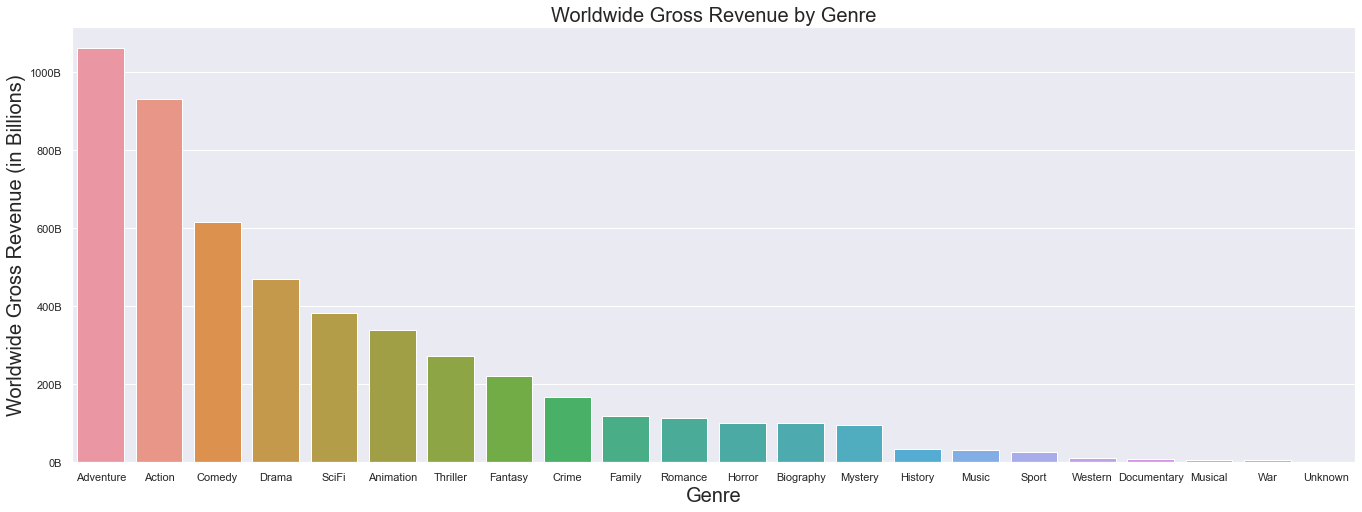

In [217]:
ylabels = ['0B', '200B', '400B', '600B', '800B', '1000B']

sns.set_style('darkgrid')
plt.figure(figsize = (23,8))
plt.ticklabel_format(style='plain')
g = sns.barplot(x = 'genre', 
            y =  'worldwide_gross_revenue', 
            data = axis_rev, 
            order = axis_rev.sort_values('worldwide_gross_revenue', ascending = False).genre)

#set labels
g.set_yticklabels(labels = ylabels)
plt.xlabel('Genre', size = 20)
plt.ylabel('Worldwide Gross Revenue (in Billions)', size = 20)
plt.title('Worldwide Gross Revenue by Genre', size = 20)
plt.show()

In [218]:
drama_ROI_mean = drama_ww_gross_df['ROI'].mean()
comedy_ROI_mean = comedy_ww_gross_df['ROI'].mean()
action_ROI_mean = action_ww_gross_df['ROI'].mean()
adventure_ROI_mean = adventure_ww_gross_df['ROI'].mean()
thriller_ROI_mean = thriller_ww_gross_df['ROI'].mean()
crime_ROI_mean = crime_ww_gross_df['ROI'].mean()
romance_ROI_mean = romance_ww_gross_df['ROI'].mean()
horror_ROI_mean = horror_ww_gross_df['ROI'].mean()
biography_ROI_mean = biography_ww_gross_df['ROI'].mean()
sciFi_ROI_mean = sciFi_ww_gross_df['ROI'].mean()
mystery_ROI_mean = mystery_ww_gross_df['ROI'].mean()
fantasy_ROI_mean = fantasy_ww_gross_df['ROI'].mean()
animation_ROI_mean = animation_ww_gross_df['ROI'].mean()
family_ROI_mean = family_ww_gross_df['ROI'].mean()
documentary_ROI_mean = documentary_ww_gross_df['ROI'].mean()
history_ROI_mean = history_ww_gross_df['ROI'].mean()
music_ROI_mean = music_ww_gross_df['ROI'].mean()
sport_ROI_mean = sport_ww_gross_df['ROI'].mean()
war_ROI_mean = war_ww_gross_df['ROI'].mean()
western_ROI_mean = western_ww_gross_df['ROI'].mean()
musical_ROI_mean = musical_ww_gross_df['ROI'].mean()
unknown_ROI_mean = unknown_ww_gross_df['ROI'].mean()


In [219]:
def outlier_treatment(x, lower, upper):
    if (lower >= x) or (x >= upper):
        return 'Yes'
    else:
        return 'No'

columns_to_check = ['column_names']

df = horror_ww_gross_df
col = ['ROI']

for col in columns_to_check: 
    Q1,Q3 = np.percentile(df[col],[25,75])
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df['outlier'] = df[col].apply(lambda x: outlier_treatment(x, lower_bound,upper_bound))
    print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")
    
    

KeyError: 'column_names'

In [220]:
genres = ["drama", "comedy", "action", "adventure", "thriller", "crime", "romance", 
          "horror", "biography", "Sci-Fi", "mystery", "fantasy", "animation", "family", 
          "documentary", "history", "music", "sport", "war", "western", "musical", 
          "unknown", "news"]
genres_ROI_mean = [drama_ROI_mean, comedy_ROI_mean, action_ROI_mean, adventure_ROI_mean, 
                   thriller_ROI_mean, crime_ROI_mean, romance_ROI_mean, horror_ROI_mean, 
                   biography_ROI_mean, sciFi_ROI_mean, mystery_ROI_mean, fantasy_ROI_mean, 
                   animation_ROI_mean, family_ROI_mean, documentary_ROI_mean, history_ROI_mean, 
                   music_ROI_mean, sport_ROI_mean, war_ROI_mean, western_ROI_mean, 
                   musical_ROI_mean, unknown_ROI_mean]


In [221]:
list_of_ROI_mean = list(zip(genres, genres_ROI_mean))

In [222]:
df_ROI_mean = pd.DataFrame(list_of_ROI_mean, columns = ['genres', 'genre_ROI_mean'])


In [223]:
df_ROI_mean.sort_values(by = 'genre_ROI_mean', ascending= False, inplace = True)


In [224]:
df_ROI_mean

,genres,genre_ROI_mean
7,horror,1266.27215
10,mystery,1184.67112
4,thriller,713.98814
17,sport,370.51899
14,documentary,345.26913
6,romance,329.62234
16,music,302.48078
9,Sci-Fi,302.18073
12,animation,285.55787
8,biography,283.82634


In [225]:
top_6_df_ROI_mean = df_ROI_mean.iloc[0:6]
top_6_df_ROI_mean

,genres,genre_ROI_mean
7,horror,1266.27215
10,mystery,1184.67112
4,thriller,713.98814
17,sport,370.51899
14,documentary,345.26913
6,romance,329.62234


<ipython-input-226-03580c00c14e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = xlabels)


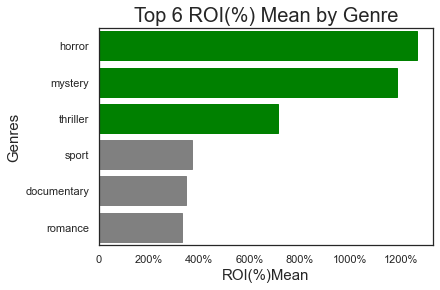

In [226]:
xlabels = ['0', '200%', '400%', '600%', '800%', '1000%', '1200%']
sns.set_theme(style = "white")
fig, axes = plt.subplots()
sns.set_color_codes('pastel')
ax = sns.barplot( x= "genre_ROI_mean", y = 'genres', data = top_6_df_ROI_mean, color = 'b')
ax.set_xticklabels(labels = xlabels)
plt.xlabel('ROI(%)Mean', size = 15)
plt.ylabel('Genres', size = 15)
plt.title('Top 6 ROI(%) Mean by Genre', size = 20)

for bar in ax.patches:
    if bar.get_width() > 680:
        bar.set_color('green')
    else:
        bar.set_color('grey')

plt.show()

In [227]:
genre_df

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,averagerating,numvotes,genre_1,genre_2,genre_3,ROI
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,6.60000,447624,Action,Adventure,Fantasy,154.66729
5,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,7.30000,665594,Action,Adventure,Sci-Fi,324.38414
11,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,8.50000,670926,Action,Adventure,Sci-Fi,582.71140
17,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,6.50000,329135,Action,Adventure,Fantasy,118.64840
22,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,6.80000,352504,Action,Adventure,Thriller,193.20697
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9608,tt1748207,2012-04-27,Sound of My Voice,135000,408015,429448,FoxS,6.60000,19387,Drama,Mystery,Sci-Fi,218.10963
9615,tt1742336,2012-06-15,Your Sister's Sister,120000,1597486,3090593,IFC,6.70000,24780,Comedy,Drama,None,2475.49417
9621,tt2309260,2015-07-10,The Gallows,100000,22764410,41656474,WB (NL),4.20000,17763,Horror,Mystery,Thriller,41556.47400
9631,tt6265828,2017-07-07,A Ghost Story,100000,1594798,2769782,A24,6.80000,46280,Drama,Fantasy,Romance,2669.78200


In [228]:
drama_ww_production_mean = drama_ww_gross_df['production_budget'].mean()
comedy_ww_production_mean = comedy_ww_gross_df['production_budget'].mean()
action_ww_production_mean = action_ww_gross_df['production_budget'].mean()
adventure_ww_production_mean = adventure_ww_gross_df['production_budget'].mean()
thriller_ww_production_mean = thriller_ww_gross_df['production_budget'].mean()


horror_ww_production_mean = horror_ww_gross_df['production_budget'].mean()

sciFi_ww_production_mean = sciFi_ww_gross_df['production_budget'].mean()
mystery_ww_production_mean = mystery_ww_gross_df['production_budget'].mean()
fantasy_ww_production_mean = fantasy_ww_gross_df['production_budget'].mean()
animation_ww_production_mean = animation_ww_gross_df['production_budget'].mean()









In [229]:
genre_production_mean_list = [drama_ww_production_mean, comedy_ww_production_mean, action_ww_production_mean, adventure_ww_production_mean, thriller_ww_production_mean, horror_ww_production_mean, sciFi_ww_production_mean, mystery_ww_production_mean, fantasy_ww_production_mean, animation_ww_production_mean]

In [230]:
mystery_ww_production_mean 

26831562.739583332

In [231]:
horror_ww_production_mean

20717521.367521368

In [232]:
genre_production_mean_list

[28112022.22354949,
 42681193.317422435,
 86388046.64723033,
 110703873.23943663,
 38755064.87179487,
 20717521.367521368,
 99889775.97029702,
 26831562.739583332,
 87374736.84210527,
 102854651.1627907]

In [239]:
budget_genre_list = ["drama",'comedy','action','adventure', 'thriller', 'horror', 'sci-Fi','mystery','fantasy','animation']

In [240]:
production_budget_mean_tuples = list(zip(budget_genre_list, genre_production_mean_list))

In [241]:
production_budget_mean_df = pd.DataFrame(production_budget_mean_tuples, columns = ['genres', 'production_budget_mean'])

In [242]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
production_budget_mean_df.sort_values(by = 'production_budget_mean', ascending= False, inplace = True)
production_budget_mean_df

,genres,production_budget_mean
3,adventure,110703873.23944
9,animation,102854651.16279
6,sci-Fi,99889775.97030
8,fantasy,87374736.84211
2,action,86388046.64723
1,comedy,42681193.31742
4,thriller,38755064.87179
0,drama,28112022.22355
7,mystery,26831562.73958
5,horror,20717521.36752


<ipython-input-243-33cb01223ea8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = xlabels)


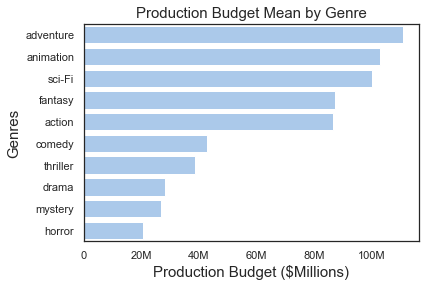

In [243]:
xlabels = ['0', '20M', '40M', '60M', '80M', '100M', '120M']
sns.set_theme(style = 'white')
fig, axes = plt.subplots()
sns.set_color_codes('pastel')
ax = sns.barplot( x= "production_budget_mean", y = 'genres', data = production_budget_mean_df,color = 'b')
ax.set_xticklabels(labels = xlabels)
plt.xlabel('Production Budget ($Millions)', size = 15)
plt.ylabel("Genres", size = 15)
plt.title('Production Budget Mean by Genre', size = 15)


    
    
plt.show()